In [1]:
from __future__ import division
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import argparse
import json
import csv
import sys
import time
import datetime
from lib import bitmex
from lib.bitmex import BitMEX
from settings import API_BASE, API_KEY, API_SECRET
from numpy import mean,absolute 
import scipy as sp
from scipy.stats import *
from scipy.stats import skew, kurtosis
from scipy.signal import *

In [ ]:
plt.rcParams['figure.figsize'] = [20, 10]


In [ ]:
1/leverage+1

In [ ]:
time2=pd.Series(datetime.datetime.now().timetuple())
df1 = pd.read_csv(name)
df_all = pd.DataFrame(df1)
df_all = pd.DataFrame(df_all.values[::-1], df_all.index, df_all.columns) # turn around data


close = pd.Series(df_all['close'])
high = pd.Series(df_all['high'])
low = pd.Series(df_all['low'])#close values 

In [57]:
close

0          9567
10         9562
20         9561
30       9566.5
40         9557
50       9500.5
60       9544.5
70       9537.5
80         9500
90       9498.5
100        9515
110      9479.5
120        9480
130        9470
140      9468.5
150      9536.5
160        9517
170        9499
180        9532
190      9553.5
200      9553.5
210      9519.5
220      9520.5
230        9526
240        9532
250      9529.5
260        9520
270      9570.5
280        9566
290      9593.5
          ...  
43200      7597
43210      7627
43220    7615.5
43230    7634.5
43240      7627
43250    7629.5
43260    7633.5
43270    7637.5
43280    7627.5
43290      7624
43300      7628
43310      7629
43320      7621
43330      7619
43340      7628
43350      7624
43360    7621.5
43370    7623.5
43380      7629
43390      7630
43400    7637.5
43410      7635
43420      7633
43430    7601.5
43440      7611
43450    7606.5
43460      7602
43470    7609.5
43480    7608.5
43490      7613
Name: close, Length: 435

In [ ]:
np.delete(price, np.s_[k::], 0)

0.9645224655039925


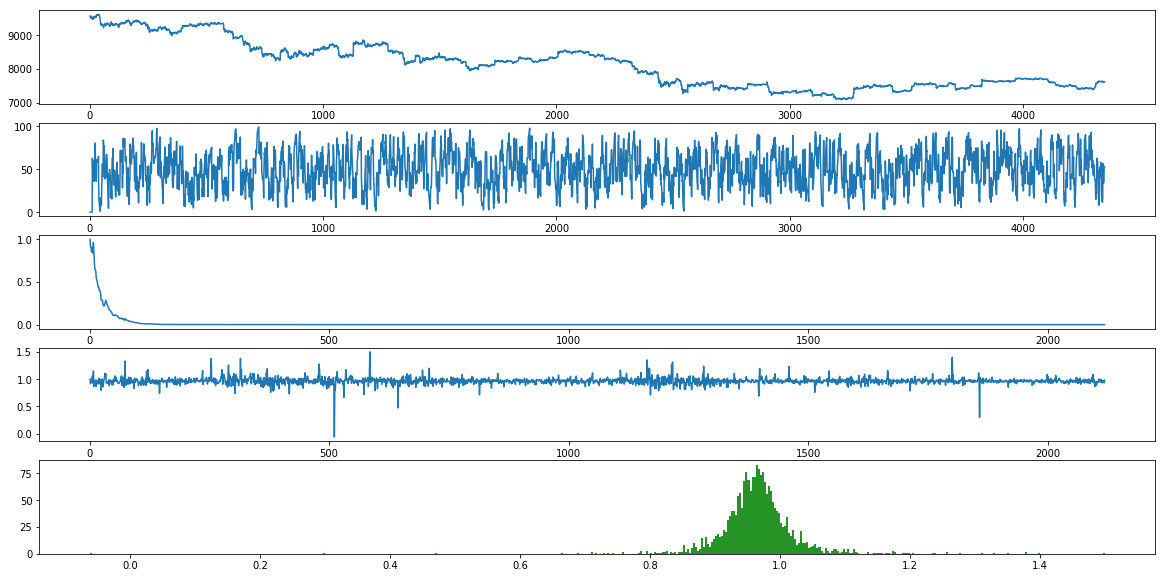

In [150]:
time2=pd.Series(datetime.datetime.now().timetuple())
df1 = pd.read_csv(name)
df_all = pd.DataFrame(df1)
df_all = pd.DataFrame(df_all.values[::-1], df_all.index, df_all.columns) # turn around data
close = pd.Series(df_all['close'])
n = 10
close = pd.Series(close.values[::n])
l = len(close)
length = l
X =0
X2 = abs(X-1)
hi = 1
lo = 99
alpha1 = -1
alpha2 = 1-alpha1
beta1 = 1
beta2 = 1-beta1
rsi_len = 10
change_close = pd.Series(np.zeros(l))
gain = pd.Series(np.zeros(l))
loss = pd.Series(np.zeros(l))
smagain = pd.Series(np.zeros(l))
smaloss = pd.Series(np.zeros(l))
RS = pd.Series(np.zeros(l))
rsi = pd.Series(np.zeros(l))
dRdt = pd.Series(np.zeros(l))
dR2dt = pd.Series(np.zeros(l))
for i in range(n+100,l):   
    #print(close[i])
    change_close[i] = close[i]-close[i-1]
    if change_close[i] > 0:
        gain[i] = change_close[i]
    elif change_close[i] < 0:
        loss[i] = change_close[i]*-1
    elif change_close[i] == 0.00000:
        loss[i] = 0
        gain[i] = 0
    if i == rsi_len:   
        smagain[rsi_len] = gain[i-rsi_len:i].sum()/rsi_len
        smaloss[rsi_len] = loss[i-rsi_len:i].sum()/rsi_len
    elif i > rsi_len: 
        smagain[i] = alpha1*smagain[i-1] + alpha2*gain[i]
        smaloss[i] = beta1*smaloss[i-1] + beta2*loss[i]
        if smaloss[i] == 0:
            rsi[i] = 100
        else:
            RS[i] = smagain[i]/smaloss[i]
            rsi[i] = 100 - 100/(1+RS[i])
           #print(RSIclose[i])
RSI102 = pd.Series(np.zeros(l))
win_len = 500
## Short Only ##  (Why is it backwards???)
leverage = 25
d = 0 #count variable
j = 0 #count variable
k = 0  #count variable
liq = 0  #count variable
price = np.zeros((l, 9))
var = RSI100
for i in range(n+100, l):
    if (var[i] < lo and j == 0):
        j = 1
        price[k, 0] = close[i]
        price[k, 2] = i
        price[k, 5] = var[i]
    elif j == 1 and high[i] > (1/leverage+1)*price[k,0]:
        liq +=1
        price[k, 1] = close[i]
        price[k, 3] = i
        j = 0
        k = k+1
    elif j == 1 and close[i] > (1/leverage/2 + 1)*price[k,0]:
        price[k, 1] = close[i]
        price[k, 3] = i
        j = 0
        k = k+1
        d +=1
    elif (var[i] > hi) and (j==1):
        #mat[j,k] = RSIclose[i]
        price[k, 3] = i
        price[k, 1] = close[i]
        price[k, 6] = var[i]
        j = 0
        k = k+1
   # d = 1
price = np.delete(price, np.s_[k::], 0)
pnl = np.ones(len(price))
pnlT = np.ones(len(price))
p = 0 ##ignore
p2 = abs(p-1) #ignore
count = 0
for i in range(0, len(price)-1):
    check = (price[i,X]/price[i,X2]-1-.00075*2)*leverage
    if check > 1:
        p = 1
        p2 = abs(p-1)
    else:
        p = 0
        p2 = abs(p-1)
    pnl[i+1] = (p2+(price[i,X]/price[i,X2]-1-.00075*2)*leverage) 
    pnlT[i+1] = pnlT[i]*(p2+(price[i,X]/price[i,X2]-1-.00075*2)*leverage)
    price[i, 4] = price[i,3]-price[i,2]
    price[i, 7] = pnl[i+1]
    price[i, 8] = pnlT[i+1]
    k = i
J = np.arange(1, l)
plt.subplot(5,1,5)
n, bins, patches = plt.hist(pnl, 500, density=False, facecolor='g', alpha=0.85)
plt.subplot(5,1,4)
plt.plot(range(1,len(pnl)+1),pnl, label='Boys per Time')
plt.subplot(5,1,3)
#plt.plot(range())
plt.plot(range(1,len(pnl)+1),pnlT, label='Boys per Time')
plt.subplot(5,1,2)
#plt.plot(range())
plt.plot(J, var[J])
plt.subplot(5,1,1)
#plt.plot(range())
plt.plot(J, close[J])


## change into DataFrames ##

price = pd.DataFrame(price)
print(np.average(pnl))
#print(np.average(price.iloc[:,4]))
#print(liq)
#print(pnlT[-1:])
plt.show()

In [ ]:
smaloss

In [ ]:
priceDF = pd.DataFrame(price)

In [ ]:
length

In [ ]:
print(100)

In [ ]:
price.iloc[50, 3]

In [ ]:
len(close)

In [ ]:
close[27]

In [ ]:
print(CCI)

In [ ]:
name

In [ ]:
price.loc[52, 'time']

In [ ]:
print(pd.DataFrame(CCIAli105B))

In [ ]:
4.579964*1.5759

In [ ]:
(7544/7416 - 1-.00075*2)*100

In [ ]:
price.iloc[25, 1]

In [ ]:
high[price]

In [ ]:
1+1/leverage

In [ ]:
np.where(pnlT>10)

In [ ]:
np.where(pnlT>1000)

In [ ]:
price.loc[31, 'time']

In [ ]:
d

In [ ]:
price.loc[71, 'time']

In [ ]:
name

In [ ]:
high[-1:]

In [ ]:
high[10:95]

In [ ]:
## CCI and RSI init only ##
time2=pd.Series(datetime.datetime.now().timetuple())
df1 = pd.read_csv(name)
df_all = pd.DataFrame(df1)
df_all = pd.DataFrame(df_all.values[::-1], df_all.index, df_all.columns) # turn around data


close = pd.Series(df_all['close'])
high = pd.Series(df_all['high'])
low = pd.Series(df_all['low'])#close values 



In [ ]:
print(np.mean(CCIAli106))

In [ ]:
for i in range(cci_len, len(close)):
    CCIAli105[i] = sp.signal.savgol_filter(CCI[])

In [ ]:
CCIAli105B[95:]

In [ ]:
J = np.arange(1,length)
plt.subplot(3, 1, 1)
plt.plot(J, CCIAli106A[J])
plt.subplot(3, 1, 2)
plt.plot(J, CCIAli106[J])
plt.subplot(3, 1, 3)
plt.plot(J, CCIAli105B[J])

In [ ]:
def mad(data):
    return mean(absolute(data-mean(data)))


def mad2(data1, data2):
    return mean(absolute(data1 - data2))

In [ ]:
M = 30/5
name = '1440_30_5m_Jun7.csv'
dl5m(1440*M, name)

In [ ]:
name = '1440_5m_Jun3.csv'

In [ ]:
name = '1440_30_1m_Jun5.csv'

In [2]:
name = '1440_7_Jun3.csv'

In [ ]:
name = '500J3.csv'

In [ ]:
dlshort_cci(500, '500J3_2.csv')

In [ ]:
def dl_st(name):
    # Create connector
    connector = bitmex.BitMEX(base_url=API_BASE)

    # Do trade history query
    path = "trade/bucketed?binSize=1m&symbol=XBTUSD&columns=symbol%2C%20timestamp%2C%20close%2C%20high%2C%20low&startTime=2018-06-05T05%3A10%3A00.000Z"
    count = 500  # max API will allow
    query = {
        'reverse': 'true',
        'start': 0,
        'count': count,
        }

    csvwriter = None
    with open(name, 'w+') as f:
        while True:
            data = connector._curl_bitmex(path=path, verb="GET", query=query, timeout=5)
            if csvwriter is None:
                # csv requires dict keys
                if len(data) == 0:
                    break
                keys = sorted(data[0].keys())
                # Write to stdout
                csvwriter = csv.DictWriter(f, fieldnames=keys)
                csvwriter.writeheader()

            csvwriter.writerows(data)
            query['start'] += count
            #if query['start'] > num-1:
            #    break
            if len(data) < count:
                break
    df1 = pd.read_csv(name)
    df_all = pd.DataFrame(df1)
    df_all = pd.DataFrame(df_all.values[::-1], df_all.index, df_all.columns) # turn around data

    close = pd.Series(df_all['close'])
    high = pd.Series(df_all['high'])
    low = pd.Series(df_all['low'])#close values 
    l = len(close)
    CCI = pd.Series(np.zeros(l))
    SMA = pd.Series(np.zeros(l))
    madmat = pd.Series(np.zeros(l))
    cci_len=95
    TP = (high+low+close)/3
    for i in range(cci_len, len(close)):
        SMA[i] = TP[i-cci_len:i].sum()/cci_len
        madmat[i] = mad(TP[i-cci_len:i])
        CCI[i] = (TP[i]-SMA[i])/(.015*madmat[i])
    j = 0
    k = 0
    CCI_500 = sp.signal.savgol_filter(CCI, 105, 3)
    cci500df = pd.DataFrame(CCI_500)
    print(cci500df)

In [ ]:
dl_starttime('boysnow.csv')

In [ ]:
dl_starttime('boysnow.csv')

In [ ]:
def dl1m(start, end,name):
    # Create connector
    connector = bitmex.BitMEX(base_url=API_BASE)

    # Do trade history query
    path = "trade/bucketed?binSize=1m&symbol=XBTUSD&columns=symbol%2C%20timestamp%2C%20close%2C%20high%2C%20low"
    count = 500  # max API will allow
    query = {
        'reverse': 'true',
        'start': start,
        'count': count,
        }

    csvwriter = None
    with open(name, 'w+') as f:
        while True:
            data = connector._curl_bitmex(path=path, verb="GET", query=query, timeout=5)
            if csvwriter is None:
                # csv requires dict keys
                if len(data) == 0:
                    break
                keys = sorted(data[0].keys())
                # Write to stdout
                csvwriter = csv.DictWriter(f, fieldnames=keys)
                csvwriter.writeheader()

            csvwriter.writerows(data)
            #data2 = pd.DataFrame
            query['start'] += count
            if query['start'] > end:
                break
            if len(data) < count:
                break

In [ ]:
def dl5m(num,name):
    # Create connector
    connector = bitmex.BitMEX(base_url=API_BASE)

    # Do trade history query
    path = "trade/bucketed?binSize=5m&symbol=XBTUSD&columns=symbol%2C%20timestamp%2C%20close%2C%20high%2C%20low"
    count = 500  # max API will allow
    query = {
        'reverse': 'true',
        'start': 0,
        'count': count,
        }

    csvwriter = None
    with open(name, 'w+') as f:
        while True:
            data = connector._curl_bitmex(path=path, verb="GET", query=query, timeout=5)
            if csvwriter is None:
                # csv requires dict keys
                if len(data) == 0:
                    break
                keys = sorted(data[0].keys())
                # Write to stdout
                csvwriter = csv.DictWriter(f, fieldnames=keys)
                csvwriter.writeheader()

            csvwriter.writerows(data)
            #data2 = pd.DataFrame
            query['start'] += count
            if query['start'] > num:
                break
            if len(data) < count:
                break

In [ ]:
boys_now = 1

while True:
    time.sleep(1)
    t = pd.Series(datetime.datetime.now().timetuple())
    if t[5] == 0:
        dlCCI1m(900, '1440j3_try.csv')
        
    else:
        boys_now


In [ ]:
dlshortCCI(500, '500J3_10.csv')

In [ ]:
dlCCI(1440, '1440j3_try.csv')

In [ ]:
name = '1440_30_1m_Jun7.csv'
dl1m(1440*30,1440*60, name)

In [ ]:
name = '1440_30_1m_Jun5.csv'

In [ ]:
pd.set_option('display.max_rows',6000)

In [ ]:
alpha1 = 0.5
alpha2 = 1-alpha1
beta1 = 0.95
beta2 = 1-beta1
rsi_len = 50
change_close = pd.Series(np.zeros(l))
gain = pd.Series(np.zeros(l))
loss = pd.Series(np.zeros(l))
smagain = pd.Series(np.zeros(l))
smaloss = pd.Series(np.zeros(l))
RS = pd.Series(np.zeros(l))
RSI100 = pd.Series(np.zeros(l))
dRdt = pd.Series(np.zeros(l))
dR2dt = pd.Series(np.zeros(l))
for i in range(1,length):   
    #print(close[i])
    change_close[i] = close[i]-close[i-1]
    if change_close[i] > 0:
        gain[i] = change_close[i]
    elif change_close[i] < 0:
        loss[i] = change_close[i]*-1
    elif change_close[i] == 0.00000:
        loss[i] = 0
        gain[i] = 0
    if i == rsi_len:   
        smagain[rsi_len] = gain[i-rsi_len:i].sum()/rsi_len
        smaloss[rsi_len] = loss[i-rsi_len:i].sum()/rsi_len
    elif i > rsi_len: 
        smagain[i] = alpha1*smagain[i-1] + alpha2*gain[i]
        smaloss[i] = beta1*smagain[i-1] + beta2*gain[i]
        if smaloss[i] == 0:
            RSI100[i] = 100
        else:
            RS[i] = smagain[i]/smaloss[i]
            RSI100[i] = 100 - 100/(1+RS[i])
           #print(RSIclose[i])

In [ ]:
fil = sp.signal.savgol_filter(RSI100, 105, 3)

In [ ]:
'1440_30_2_1m_Jun7.csv'